# **Figure ?.** Resolution Study
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created |  2/13/2022          |
| Updated |  7/22/2022          |

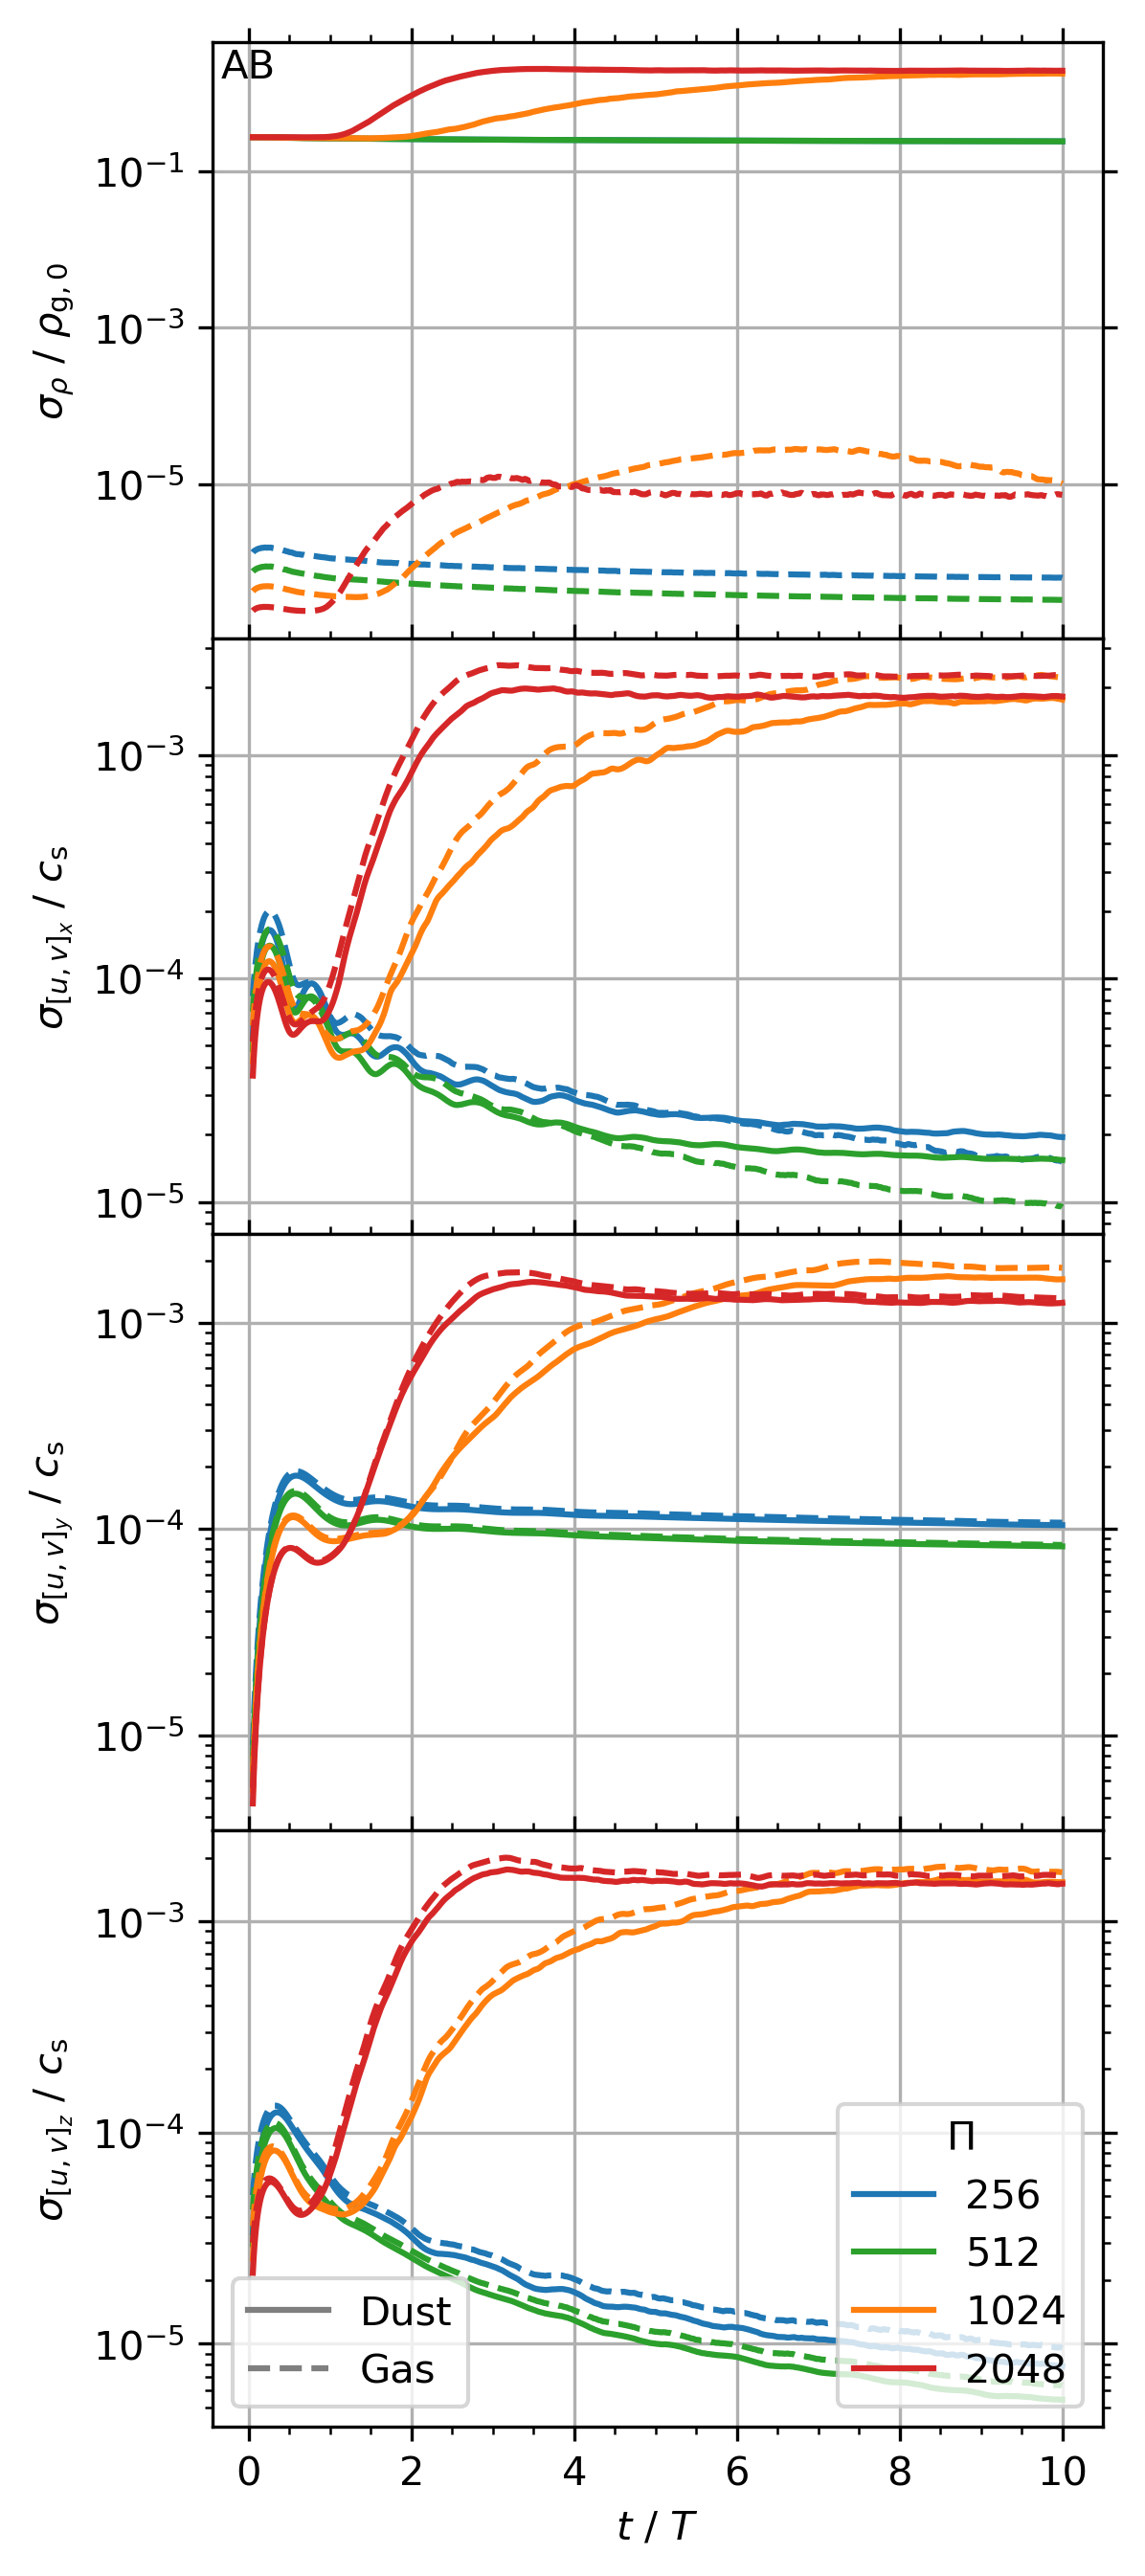

In [7]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(4, 1, sharex='col', sharey='row', figsize=(4, 11), dpi=300)
workdir = '../unstrat'
case = 'AB'
Pi = 0.01
reses = [['256', 'tab:blue'], ['512', 'tab:green'],
         ['1024', 'tab:orange'], ['2048', 'tab:red']]
psi = 5 # Plot starting index
lns = []

for res in reses:
    path = f'{workdir}/{case}/{Pi}/{res[0]}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    c_s = athinput['hydro']['iso_sound_speed']
    Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
    Ly = athinput['mesh']['x2max'] - athinput['mesh']['x2min']
    Lz = athinput['mesh']['x3max'] - athinput['mesh']['x3min']
    Mg = Lx*Ly*Lz
    Mp = epsilon*Mg
    hst = athena_read.hst(f'{path}/output/SI.hst')
    # Gas dispersions
    sd_rhog = np.sqrt(hst['drhog2'] - (hst['drhog'])**2)
    sd_ux   = np.sqrt(hst['dux2']/Mg - (hst['dux']/Mg)**2)
    sd_uy   = np.sqrt(hst['duy2']/Mg - (hst['duy']/Mg)**2)
    sd_uz   = np.sqrt(2*hst['2-KE']/Mg - (hst['2-mom']/Mg)**2)
    # Dust dispersions
    sd_rhop = np.sqrt(hst['drhop2'] - (hst['drhop'])**2)
    sd_vx   = np.sqrt(hst['dvpx2']/Mp - (hst['dvpx']/Mp)**2)
    sd_vy   = np.sqrt(hst['dvpy2']/Mp - (hst['dvpy']/Mp)**2)
    sd_vz   = np.sqrt(hst['dvpz2']/Mp - (hst['dvpz']/Mp)**2)

    # Plot dust dispersions
    axs[0].semilogy(hst['time'][psi:], sd_rhop[psi:],
                                    color=res[1], label=res[0])
    axs[1].semilogy(hst['time'][psi:], sd_vx[psi:]/c_s,
                                    color=res[1], label=res[0])
    axs[2].semilogy(hst['time'][psi:], sd_vy[psi:]/c_s,
                                    color=res[1], label=res[0])
    ln, = axs[3].semilogy(hst['time'][psi:], sd_vz[psi:]/c_s,
                                    color=res[1], label=res[0])
    lns.append(ln)

    # Plot gas dispersions
    axs[0].semilogy(hst['time'][psi:], sd_rhog[psi:],   color=res[1], ls='--')
    axs[1].semilogy(hst['time'][psi:], sd_ux[psi:]/c_s, color=res[1], ls='--')
    axs[2].semilogy(hst['time'][psi:], sd_uy[psi:]/c_s, color=res[1], ls='--')
    axs[3].semilogy(hst['time'][psi:], sd_uz[psi:]/c_s, color=res[1], ls='--')

# Plot ghost points for colorless line style legend
ls_dust, = axs[3].semilogy([], [], color='tab:gray', label='Dust')
ls_gas,  = axs[3].semilogy([], [], color='tab:gray', ls='--', label='Gas')

# Add multiple legends
legend_ls = axs[3].legend(handles=[ls_dust, ls_gas], loc='lower left')
axs[3].add_artist(legend_ls)
axs[3].legend(handles=lns[:4], loc='lower right', title=r'$\Pi$')

# Format subplots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.tick_params(which='both', top=True, right=True)

axs[0].set(ylabel=r'$\sigma_\rho$ / $\rho_\mathrm{g,0}$')
axs[1].set(ylabel=r'$\sigma_{[u,v]_x}$ / $c_\mathrm{s}$')
axs[2].set(ylabel=r'$\sigma_{[u,v]_y}$ / $c_\mathrm{s}$')
axs[3].set(ylabel=r'$\sigma_{[u,v]_z}$ / $c_\mathrm{s}$')
axs[3].set(xlabel=r'$t$ / $T$')
axs[0].text(0.01, 0.99, 'AB', ha='left', va='top',
            transform=axs[0].transAxes)

plt.subplots_adjust(hspace=0, wspace=0)
# plt.savefig('figs/dispersions.pdf', bbox_inches='tight', pad_inches=0.01)
# plt.savefig('figs/dispersions.png', bbox_inches='tight', pad_inches=0.01)

In [2]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

## AB, Π=0.05
$\tau_\mathrm{s}=0.1$

$\epsilon=1.0$

### DDD

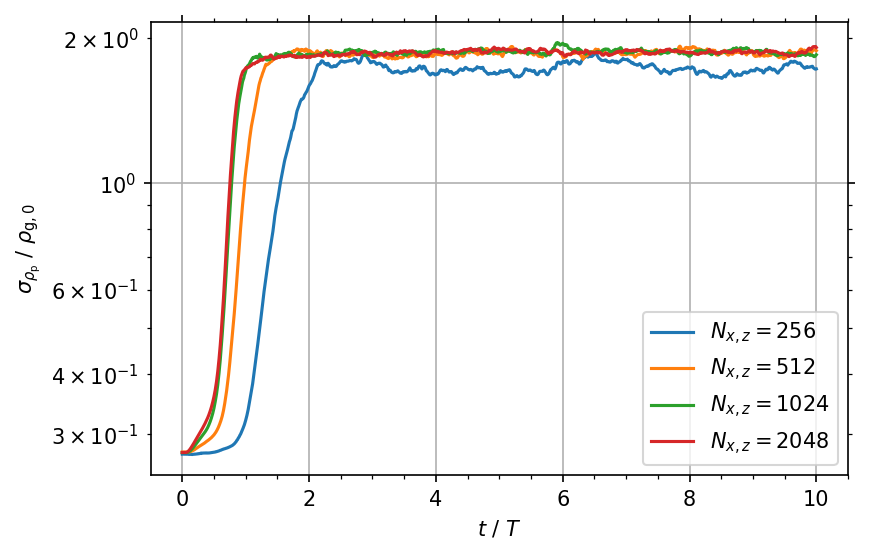

In [3]:
fig, ax = plt.subplots(dpi=150)
run = 'AB'
Pi = '0.05'
ress = ['256', '512', '1024', '2048']

for res in ress:
    hst = athena_read.hst('../unstrat/%s/%s/%s/output/SI.hst'%(run, Pi, res))
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label=r'$N_{x,z}=$'+res)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
ax.tick_params(axis='both', which='both', top=True, right=True)


### CPDD

AB/0.05/256 : 18.9% ρₚ = 0
AB/0.05/512 : 26.2% ρₚ = 0
AB/0.05/1024: 29.0% ρₚ = 0
AB/0.05/2048: 30.4% ρₚ = 0


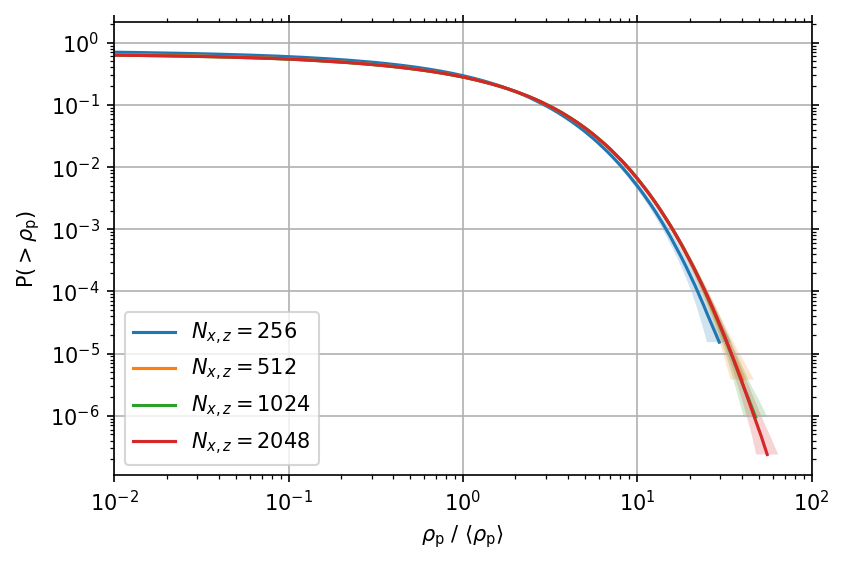

In [4]:
fig, ax = plt.subplots(dpi=150)
run = 'AB'
xlim = (1e-2, 1e2)
Pi = '0.05'
ress = ['256', '512', '1024', '2048']

for res in ress:
    data = np.load('../unstrat/%s/%s/%s/output/cpdd.npz'%(run, Pi, res))
    nonzeros = np.count_nonzero(data['avgs'])
    size = data['avgs'].size
    zeros = size - nonzeros
    print('{}/{}/{:<4}: {:.1f}% ρₚ = 0'.format(run, Pi, res, 100*zeros/size))
    ax.loglog(data['avgs'], data['cdf'], label=r'$N_{x,z}=$'+res)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=xlim, xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$',
       ylabel=r'P$(>\rho_\mathrm{p})$')
ax.tick_params(axis='both', which='both', top=True, right=True)


## ΒΑ, Π=0.05
$\tau_S=1.0$

$\epsilon=0.2$

### DDD

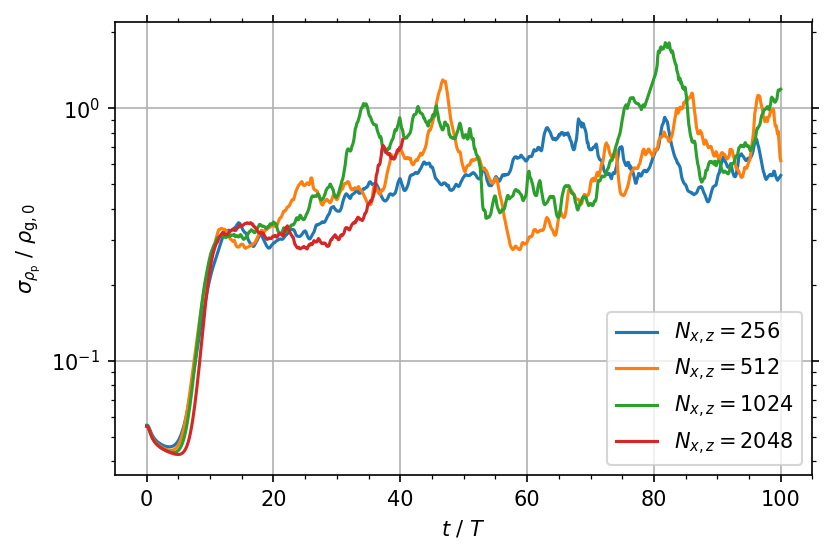

In [5]:
fig, ax = plt.subplots(dpi=150)
run = 'BA'
Pi = '0.05'
ress = ['256', '512', '1024', '2048']

for res in ress:
    hst = athena_read.hst('../unstrat/%s/%s/%s/output/SI.hst'%(run, Pi, res))
    times = hst['time']
    rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)
    ax.semilogy(times, rhop_amps, label=r'$N_{x,z}=$'+res)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$t$ / $T$', ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
ax.tick_params(axis='both', which='both', top=True, right=True)


### CPDD

BA/0.05/256 : 0.3% ρₚ = 0
BA/0.05/512 : 0.2% ρₚ = 0
BA/0.05/1024: 0.5% ρₚ = 0


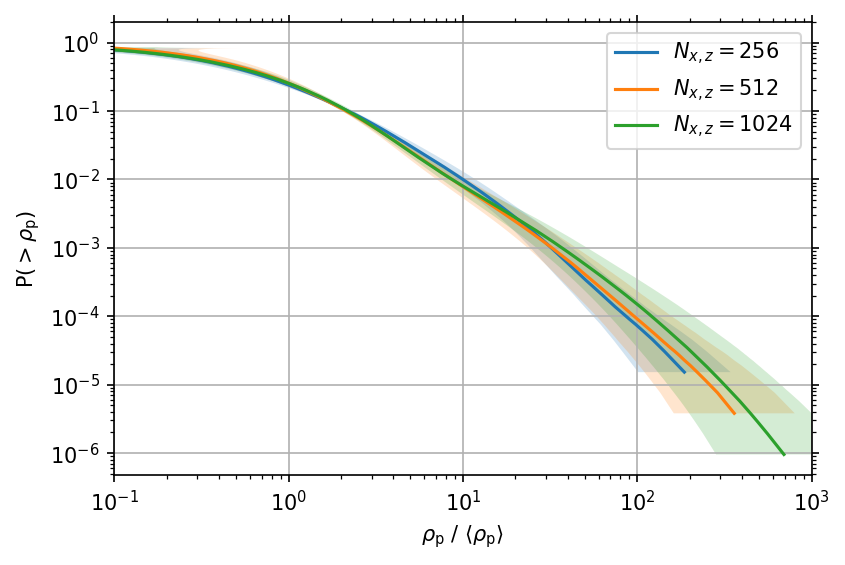

In [6]:
fig, ax = plt.subplots(dpi=150)
run = 'BA'
xlim = (1e-1, 1e3)
Pi = '0.05'
ress = ['256', '512', '1024',]# '2048']

for res in ress:
    data = np.load('../unstrat/%s/%s/%s/output/cpdd.npz'%(run, Pi, res))
    nonzeros = np.count_nonzero(data['avgs'])
    size = data['avgs'].size
    zeros = size - nonzeros
    print('{}/{}/{:<4}: {:.1f}% ρₚ = 0'.format(run, Pi, res, 100*zeros/size))
    ax.loglog(data['avgs'], data['cdf'], label=r'$N_{x,z}=$'+res)
    ax.fill_betweenx(data['cdf'], data['avgs']/data['stds'],
                     data['avgs']*data['stds'], alpha=0.2)

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlim=xlim, xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$',
       ylabel=r'P$(>\rho_\mathrm{p})$')
ax.tick_params(axis='both', which='both', top=True, right=True)
